In [1]:
import os

import cv2
import numpy as np
import re
import glob
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import entropy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

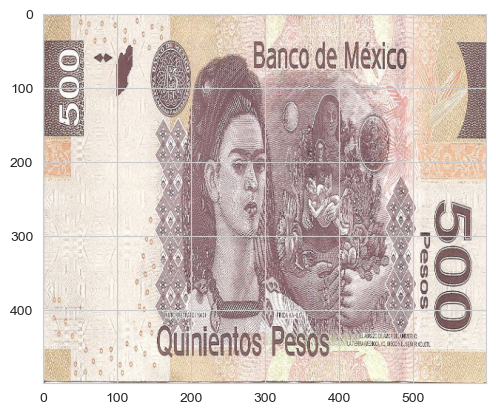

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# create an empty dictionary to hold the image data
bills = {'MX020':[],'MX050':[],'MX100':[],'MX200':[],'MX500':[]}

# define the target size for the images
target_size = (600, 500)

# load the image data into the dictionary and resize each image
for filename in os.listdir('billetes'):
    for bill in bills:
        if bill in filename:
            img = cv2.imread(os.path.join('billetes',filename))
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img_resized = cv2.resize(img, target_size)
                bills[bill].append(img_resized)

# display one of the images
plt.imshow(bills['MX500'][6] / 255.0)
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

# combine the image data into a single array for each class
X_020 = np.array(bills['MX020'])
X_050 = np.array(bills['MX050'])
X_100 = np.array(bills['MX100'])
X_200 = np.array(bills['MX200'])
X_500 = np.array(bills['MX500'])

# create corresponding target arrays
y_020 = np.zeros(X_020.shape[0], dtype=int)
y_050 = np.ones(X_050.shape[0], dtype=int)
y_100 = np.full(X_100.shape[0], 2, dtype=int)
y_200 = np.full(X_200.shape[0], 3, dtype=int)
y_500 = np.full(X_500.shape[0], 4, dtype=int)

# concatenate the data and targets into a single array
X = np.concatenate((X_020, X_050, X_100, X_200, X_500), axis=0)
y = np.concatenate((y_020, y_050, y_100, y_200, y_500), axis=0)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# create an empty list to hold the image data
data = []
labels = []

# load the image data into the list
for filename in os.listdir('billetes'):
    img = cv2.imread(os.path.join('billetes', filename))
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (600, 500))  # resize the images to 224x224
        data.append(img.flatten())
        labels.append(filename.split('_')[0])

# convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.2, random_state=42)

# train a random forest classifier on the training set
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# evaluate the model on the validation set
y_pred = clf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print('Validation accuracy: %.2f%%' % (accuracy * 100))


Validation accuracy: 100.00%


In [13]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# create an empty dictionary to hold the image data and labels
bills = {'MX020':[],'MX050':[],'MX100':[],'MX200':[],'MX500':[]}
labels = {'MX020':0,'MX050':1,'MX100':2,'MX200':3,'MX500':4}

# load the image data and labels into the lists
for filename in os.listdir('billetes'):
    for bill in bills:
        if bill in filename:
            img = cv2.imread(os.path.join('billetes',filename))
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
                bills[bill].append(img)
                labels[bill].append(labels[bill])

# convert the lists to arrays
X = np.concatenate([np.array(bills[bill]) for bill in bills])
y = np.concatenate([np.array(labels[bill]) for bill in labels])

# flatten the image arrays
X = X.reshape(X.shape[0], -1)

# create and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# capture an image from the webcam and preprocess it
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# make a prediction using the trained classifier
pred = clf.predict(gray.reshape(1, -1))

# display the predicted bill denomination
for bill, label in labels.items():
    if label == pred:
        print('Detected bill denomination:', bill)


AttributeError: 'int' object has no attribute 'append'